# 워드클라우드

In [2]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
!pip install konlpy > /dev/null

In [2]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving gift.txt to gift.txt


In [3]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving heart.jpg to heart.jpg


## 한글 텍스트 전처리

In [4]:
with open(textfile) as fp:
  text = fp.read()

In [5]:
from konlpy.tag import Okt
okt = Okt()

In [6]:
tokens = okt.nouns(text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [7]:
# 영문 숫자 제거
import re
new_tokens = []
for token in tokens:
  gift = re.sub('[A-Za-z0-9]', '', token)
  if gift:
    new_tokens.append(gift)

In [8]:
# 한글 폰트 사용
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

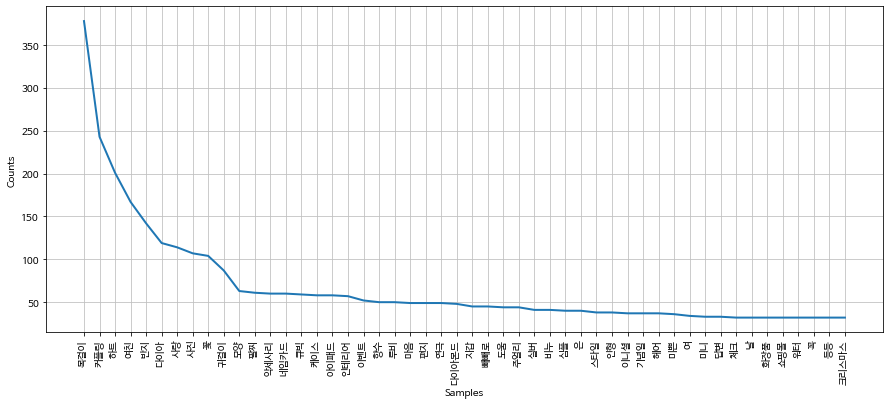

In [35]:
gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [34]:
stoptext = """
  선물 추천 것 가격 수 기능 제품 저 제 생각 여자 여자친구 사용 요 더 분 구매 보급 판매 참고
  머리 한번 제작 용 준 디자인 거 네이버 사람 배송 중 정말 후기 티니 개 감동 몇개 신지 커플 투척
  클래식 버핏 빅사 이즈 하프 브랜드 인기 세대 하나 고급 때 마감 요즘 곱창 선택 직접 상품 해 가능
  페이 부담 향 로티 남자 협찬 전 핸드 의미 변경 곳 끈 등 오늘 가지 남녀 그냥 위 색상 아래 포장 처 조금 정도
  링크 쇼핑 때문 가장 여성 소품 밍티풀 하루 링 주소 정보 질문 친구 스토어 아주 할인 센스 지금 고민 남
  꽃말 보시 처리 독서 나 밴드 생일 사이트 아이템 모델 안쪽 이면 스
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['반지', '목걸이', '가디건', '모자', '커플룩', '니트', '가디건', '공용', '체크', '라인']

In [33]:
from wordcloud import WordCloud
from PIL import Image

In [42]:
data = gift.vocab().most_common(200)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
    font_path=path, relative_scaling=0.2,
    background_color='white'
).generate_from_frequencies(dict(data))

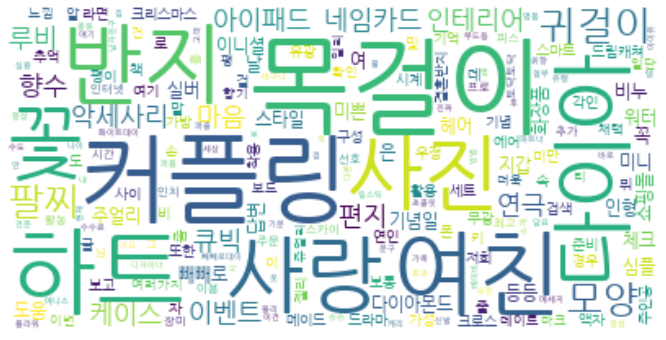

In [43]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 하트위에 표시

In [44]:
mask = np.array(Image.open(maskfile))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [46]:
wc = WordCloud(
    font_path=path, relative_scaling=0.2,
    background_color='white', mask=mask,
    min_font_size=1, max_words=120
).generate_from_frequencies(dict(data))

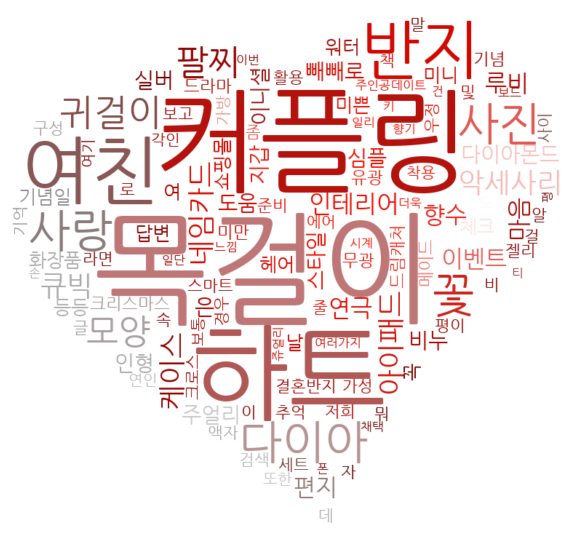

In [47]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), 
           interpolation='bilinear')
plt.axis('off')
plt.show()